# Part 1

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Problem 1

In [2]:
"""
Problem Statement 1: (Keep the relevant data)

The census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.
We may need the following columns.
	State name
	District name
	Population
	Male
	Female
	Literate
	Male_Literate
	Female_Literate
	Rural_Households
	Urban_Households
	Households
	Age_Group_0_29
	Age_Group_30_49
	Age_Group_50
	Age not stated
Import the data to pandas and keep only the required columns. 
"""

'\nProblem Statement 1: (Keep the relevant data)\n\nThe census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.\nWe may need the following columns.\n\uf0d8\tState name\n\uf0d8\tDistrict name\n\uf0d8\tPopulation\n\uf0d8\tMale\n\uf0d8\tFemale\n\uf0d8\tLiterate\n\uf0d8\tMale_Literate\n\uf0d8\tFemale_Literate\n\uf0d8\tRural_Households\n\uf0d8\tUrban_Households\n\uf0d8\tHouseholds\n\uf0d8\tAge_Group_0_29\n\uf0d8\tAge_Group_30_49\n\uf0d8\tAge_Group_50\n\uf0d8\tAge not stated\nImport the data to pandas and keep only the required columns. \n'

In [3]:
# Passing the columns for filtering
columns = '''State name
District name
Population
Male
Female
Literate
Male_Literate
Female_Literate
Rural_Households
Urban_Households
Households
Age_Group_0_29
Age_Group_30_49
Age_Group_50
Age not stated'''
columns_needed = columns.split("\n")

# Reading the data and storing in census with only required columns mentioned in document
census = pd.read_csv("Data/census_2011.csv", usecols=columns_needed)

In [4]:
census.head(3)

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0


### Problem 2

In [5]:
"""
Problem Statement 2: (Rename the Column names)

For uniformity in the datasets and taking into consideration the census year, we need to rename some columns. 
	State name  to State/UT
	District name  to District
	Male_Literate to Literate_Male
	Female_Literate to Literate_Female
	Rural_Households  to Households_Rural
	Urban_ Households  to Households_Urban
	Age_Group_0_29 to Young_and_Adult
	Age_Group_30_49 to Middle_Aged
	Age_Group_50 to Senior_Citizen
	Age not stated to Age_Not_Stated
"""

'\nProblem Statement 2: (Rename the Column names)\n\nFor uniformity in the datasets and taking into consideration the census year, we need to rename some columns. \n\uf0d8\tState name  to State/UT\n\uf0d8\tDistrict name  to District\n\uf0d8\tMale_Literate to Literate_Male\n\uf0d8\tFemale_Literate to Literate_Female\n\uf0d8\tRural_Households  to Households_Rural\n\uf0d8\tUrban_ Households  to Households_Urban\n\uf0d8\tAge_Group_0_29 to Young_and_Adult\n\uf0d8\tAge_Group_30_49 to Middle_Aged\n\uf0d8\tAge_Group_50 to Senior_Citizen\n\uf0d8\tAge not stated to Age_Not_Stated\n'

In [6]:
# Renaming columns as per Instruction
columns_rename = """State name  to State/UT
District name  to District
Male_Literate to Literate_Male
Female_Literate to Literate_Female
Rural_Households  to Households_Rural
Urban_Households  to Households_Urban
Age_Group_0_29 to Young_and_Adult
Age_Group_30_49 to Middle_Aged
Age_Group_50 to Senior_Citizen
Age not stated to Age_Not_Stated"""
rename_dict = {k.strip(): v.strip() for k,v in map(lambda x: x.split(" to "), columns_rename.split("\n"))}

census_renamed_cols = census.rename(rename_dict, axis=1)
census_renamed_cols.head(3)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0


### Problem 3

In [7]:
"""
Problem Statement 3: (Rename State/UT Names)

The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.
Examples: 
	Andaman and Nicobar Islands
	Arunachal Pradesh
	Bihar
"""

'\nProblem Statement 3: (Rename State/UT Names)\n\nThe State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.\nExamples: \n\uf0d8\tAndaman and Nicobar Islands\n\uf0d8\tArunachal Pradesh\n\uf0d8\tBihar\n'

In [8]:
def state_name_correction(df, col):
    df[col] = df[col].str.lower()
    
    df[col] = df[col].str.replace("&", "and")
    
    # Renaming the State Names as per Instructions given
    # First I am title casing the state name so all work first letterbecomes Caps, then I am manually replacing "And" with "and"
    df[col] = df[col].apply(lambda state_name: state_name.title().replace(' And ', ' and '))
    
    # Govt data has *, hence replacing them
    df[col] = df[col].str.replace("*", "", regex=False)
    replace_names = {
        "Puducherry": "Pondicherry",
        "Delhi": "Nct Of Delhi",
        "Odisha": "Orissa",
        "All India": "India"
    }
    df[col] = df[col].replace(replace_names)
    
    return df

In [9]:
census_renamed_cols = state_name_correction(census_renamed_cols, "State/UT")
census_renamed_cols = state_name_correction(census_renamed_cols, "District")
census_renamed_cols['State/UT'].unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Nct Of Delhi', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Sikkim', 'Arunachal Pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Orissa', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Maharashtra', 'Andhra Pradesh',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Pondicherry', 'Andaman and Nicobar Islands'], dtype=object)

### Problem 4

In [10]:
"""
Problem Statement 4: (New State/UT formation)

	In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.

	In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 
"""

'\nProblem Statement 4: (New State/UT formation)\n\n\uf0d8\tIn 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.\n\n\uf0d8\tIn 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. \n'

In [11]:
# I am reading the file given and storing the data in a teleagana_dict list
def get_state_district_mapping():
    telegana_dist = []
    file_path = "Data/Telangana.txt"
    with open(file_path) as f:
        for l in f.readlines():
            if l is not None:
                telegana_dist.append(l.strip().lower())

    # I am manullay storing distrit list in list
    laddak_dict = ['Leh(Ladakh)', "Kargil"]

    # Creating a mapping dictionary
    state_district_mapping = {
        "Telangana" : telegana_dist,
        "Laddakh": laddak_dict
    }
    return state_district_mapping

def map_state_dict(state_district_row):
    # I am checking for every state-district mapping, if the district is present in state list, if yes returning the state name else return same state name
    def_state_name, district_name = state_district_row
    state_district_mapping = get_state_district_mapping()
    for state_name, dist_list in state_district_mapping.items():
        if district_name.lower() in dist_list:
            return state_name
    return def_state_name

In [12]:
# I am taking state and distrcit name then pass to my Fn
census_renamed_cols['State/UT'] = census_renamed_cols[['State/UT', 'District']].apply(map_state_dict, axis=1)
census_renamed_cols['State/UT'].unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Nct Of Delhi', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Sikkim', 'Arunachal Pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Orissa', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Maharashtra', 'Telangana',
       'Andhra Pradesh', 'Karnataka', 'Goa', 'Lakshadweep', 'Kerala',
       'Tamil Nadu', 'Pondicherry', 'Andaman and Nicobar Islands'],
      dtype=object)

### Problem 5

In [13]:
"""
Problem Statement 5: (Find and process Missing Data)
Find and store the percentage of data missing for each column.
Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.

Hint:
	Population = Male + Female
	Literate = Literate_Male + Literate_Female
	Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated
	Households = Households_Rural + Households_Urban 

Create a visualization that compares the amount of missing data before and after the data-filling process was done. 
"""

'\nProblem Statement 5: (Find and process Missing Data)\nFind and store the percentage of data missing for each column.\nSome data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.\n\nHint:\n\uf0d8\tPopulation = Male + Female\n\uf0d8\tLiterate = Literate_Male + Literate_Female\n\uf0d8\tPopulation  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated\n\uf0d8\tHouseholds = Households_Rural + Households_Urban \n\nCreate a visualization that compares the amount of missing data before and after the data-filling process was done. \n'

In [14]:
census_renamed_cols.isna().sum()

State/UT             0
District             0
Population          30
Male                30
Female              33
Literate            36
Literate_Male       31
Literate_Female     27
Households_Rural    42
Households_Urban    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [15]:
percet_na_missing = census_renamed_cols.isna().sum()/census_renamed_cols.shape[0] * 100
percet_na_missing

State/UT            0.00000
District            0.00000
Population          4.68750
Male                4.68750
Female              5.15625
Literate            5.62500
Literate_Male       4.84375
Literate_Female     4.21875
Households_Rural    6.56250
Households_Urban    5.15625
Households          5.00000
Young_and_Adult     4.84375
Middle_Aged         4.68750
Senior_Citizen      4.84375
Age_Not_Stated      5.46875
dtype: float64

In [16]:
# Population = Male + Female
census_renamed_cols.loc[census_renamed_cols['Population'].isna(), "Population"] = census_renamed_cols[census_renamed_cols['Population'].isna()]["Male"] + census_renamed_cols[census_renamed_cols['Population'].isna()]["Female"] 


worker_cols = ["Workers", "Non_Workers"]
census_renamed_cols[worker_cols] = pd.read_csv("Data/census_2011.csv", usecols=worker_cols)

# Still One Value is missing, Hence I added Worker and Non-Worker column
census_renamed_cols.loc[census_renamed_cols['Population'].isna(), "Population"] = census_renamed_cols[census_renamed_cols['Population'].isna()]["Workers"] + census_renamed_cols[census_renamed_cols['Population'].isna()]["Non_Workers"] 

# Dropping added columns
census_renamed_cols = census_renamed_cols.drop(["Workers", "Non_Workers"], axis=1)

In [17]:
#Filling the Male and Female Population

# Male = Population - Female
census_renamed_cols.loc[census_renamed_cols['Male'].isna(), "Male"] = census_renamed_cols.loc[census_renamed_cols['Male'].isna()]["Population"] - census_renamed_cols.loc[census_renamed_cols['Male'].isna()]["Female"]

# Female = Population - Male
census_renamed_cols.loc[census_renamed_cols['Female'].isna(), "Female"] = census_renamed_cols.loc[census_renamed_cols['Female'].isna()]["Population"] - census_renamed_cols.loc[census_renamed_cols['Female'].isna()]["Male"]

In [18]:
# Literate = Literate_Male + Literate_Female
census_renamed_cols.loc[census_renamed_cols['Literate'].isna(), "Literate"] = census_renamed_cols.loc[census_renamed_cols['Literate'].isna()]["Literate_Male"] + census_renamed_cols.loc[census_renamed_cols['Literate'].isna()]["Literate_Female"]

# Literate_Male = Literate - Literate_Female
census_renamed_cols.loc[census_renamed_cols['Literate_Male'].isna(), "Literate_Male"] = census_renamed_cols.loc[census_renamed_cols['Literate_Male'].isna()]["Literate"] - census_renamed_cols.loc[census_renamed_cols['Literate_Male'].isna()]["Literate_Female"]

# Literate_Female = Literate - Literate_Male
census_renamed_cols.loc[census_renamed_cols['Literate_Female'].isna(), "Literate_Female"] = census_renamed_cols.loc[census_renamed_cols['Literate_Female'].isna()]["Literate"] - census_renamed_cols.loc[census_renamed_cols['Literate_Female'].isna()]["Literate_Male"]

In [19]:
# Still I could see there are three rows with Null values
census_renamed_cols.loc[census_renamed_cols['Literate'].isna() | census_renamed_cols['Literate_Male'].isna() | census_renamed_cols['Literate_Female'].isna()]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
329,West Bengal,Uttar Dinajpur,3007134.0,1551066.0,1456068.0,NaN,853495.0,NaN,683981.0,94269.0,778250.0,1916033.0,704859.0,385155.0,1087.0
349,Jharkhand,Deoghar,1492073.0,775022.0,717051.0,793538.0,NaN,NaN,257373.0,64337.0,321710.0,944961.0,338413.0,205514.0,3185.0
568,Karnataka,Udupi,1177361.0,562131.0,615230.0,NaN,NaN,460725.0,269817.0,115572.0,385389.0,NaN,340903.0,276234.0,659.0


In [20]:
# Passing the columns for filtering
columns = '''Below_Primary_Education
Primary_Education
Middle_Education
Secondary_Education
Higher_Education
Graduate_Education
Other_Education
Literate_Education
Illiterate_Education
Total_Education'''
columns_needed = columns.split("\n")
print(columns_needed)

['Below_Primary_Education', 'Primary_Education', 'Middle_Education', 'Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education', 'Literate_Education', 'Illiterate_Education', 'Total_Education']


In [21]:
education_details = pd.read_csv("Data/census_2011.csv", usecols=columns_needed)

In [22]:
education_columns_without_below_primary_education = ['Primary_Education', 'Middle_Education', 'Secondary_Education', 'Higher_Education', 'Graduate_Education', 'Other_Education']
education_details[education_columns_without_below_primary_education].sum(axis=1)

0      344399.0
1      306636.0
2       65041.0
3       32394.0
4      160644.0
         ...   
635     33910.0
636    135618.0
637     21672.0
638     71199.0
639    143623.0
Length: 640, dtype: float64

In [23]:
# I could see a correlation of 99% bt Literate and Education columns not considering Below Primary Educayion
# So I am mapping the data from education details since I cannot find any way to directly find the Null values
res = education_details["Literate_Education"] - education_details["Below_Primary_Education"]
census_renamed_cols["Literate"].corr(res)

0.9900199590468538

In [24]:
index_with_literate_null = census_renamed_cols.loc[census_renamed_cols["Literate"].isna(), "Literate"].index
census_renamed_cols.loc[census_renamed_cols["Literate"].isna(), "Literate"] = education_details.loc[index_with_literate_null, "Literate_Education"] - education_details.loc[index_with_literate_null, "Below_Primary_Education"]

In [25]:
# Still I could see there are rows with Null values
census_renamed_cols.loc[census_renamed_cols['Literate'].isna() | census_renamed_cols['Literate_Male'].isna() | census_renamed_cols['Literate_Female'].isna()]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
329,West Bengal,Uttar Dinajpur,3007134.0,1551066.0,1456068.0,1219505.0,853495.0,NaN,683981.0,94269.0,778250.0,1916033.0,704859.0,385155.0,1087.0
349,Jharkhand,Deoghar,1492073.0,775022.0,717051.0,793538.0,NaN,NaN,257373.0,64337.0,321710.0,944961.0,338413.0,205514.0,3185.0
568,Karnataka,Udupi,1177361.0,562131.0,615230.0,875933.0,NaN,460725.0,269817.0,115572.0,385389.0,NaN,340903.0,276234.0,659.0


In [26]:
# After Filling Lterate, we can run same method which we used to fill Literate_Male and Literate_Female values

# Literate = Literate_Male + Literate_Female
census_renamed_cols.loc[census_renamed_cols['Literate'].isna(), "Literate"] = census_renamed_cols.loc[census_renamed_cols['Literate'].isna()]["Literate_Male"] + census_renamed_cols.loc[census_renamed_cols['Literate'].isna()]["Literate_Female"]

# Literate_Male = Literate - Literate_Female
census_renamed_cols.loc[census_renamed_cols['Literate_Male'].isna(), "Literate_Male"] = census_renamed_cols.loc[census_renamed_cols['Literate_Male'].isna()]["Literate"] - census_renamed_cols.loc[census_renamed_cols['Literate_Male'].isna()]["Literate_Female"]

# Literate_Female = Literate - Literate_Male
census_renamed_cols.loc[census_renamed_cols['Literate_Female'].isna(), "Literate_Female"] = census_renamed_cols.loc[census_renamed_cols['Literate_Female'].isna()]["Literate"] - census_renamed_cols.loc[census_renamed_cols['Literate_Female'].isna()]["Literate_Male"]

In [27]:
# Still I could see there are one rows with Null values
census_renamed_cols.loc[census_renamed_cols['Literate'].isna() | census_renamed_cols['Literate_Male'].isna() | census_renamed_cols['Literate_Female'].isna()]

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
349,Jharkhand,Deoghar,1492073.0,775022.0,717051.0,793538.0,NaN,NaN,257373.0,64337.0,321710.0,944961.0,338413.0,205514.0,3185.0


In [28]:
census_renamed_cols["Literate_Male_percent"] = (census_renamed_cols["Literate_Male"]*100/census_renamed_cols["Literate"])
census_renamed_cols["Literate_Female_percent"] = census_renamed_cols["Literate_Female"]*100/census_renamed_cols["Literate"]

In [29]:
census_renamed_cols.loc[census_renamed_cols["State/UT"] == "Jharkhand", ["State/UT", "District", "Literate_Male_percent", "Literate_Female_percent"]]

,State/UT,District,Literate_Male_percent,Literate_Female_percent
345,Jharkhand,Garhwa,62.000900,37.999100
346,Jharkhand,Chatra,59.581501,40.418499
347,Jharkhand,Kodarma,61.186576,38.813424
348,Jharkhand,Giridih,62.525060,37.474940
349,Jharkhand,Deoghar,NaN,NaN
350,Jharkhand,Godda,62.233280,37.766720
351,Jharkhand,Sahibganj,59.450651,40.549349
352,Jharkhand,Pakur,58.656884,41.343116
353,Jharkhand,Dhanbad,58.933204,41.066796
354,Jharkhand,Bokaro,59.605503,40.394497


In [30]:
# On checking On an Average in Jharkand, the literate population is slpit at arounf 60% and 40%
census_renamed_cols.loc[census_renamed_cols["State/UT"] == "Jharkhand", [ "Literate_Male_percent", "Literate_Female_percent"]].mean()

Literate_Male_percent      59.373759
Literate_Female_percent    40.626241
dtype: float64

In [31]:
# So I assuming the same will be true for "Deoghar" as well, and splitting Literate to 60 and 40 to Male and Female
literate_null_cond = census_renamed_cols['Literate'].isna() | census_renamed_cols['Literate_Male'].isna() | census_renamed_cols['Literate_Female'].isna()
print(census_renamed_cols.loc[literate_null_cond, "Literate"])
print(round(census_renamed_cols.loc[literate_null_cond, "Literate"] * .59328198))
print(round(census_renamed_cols.loc[literate_null_cond, "Literate"] * .40671802))
census_renamed_cols.loc[literate_null_cond, "Literate_Male"] = round(census_renamed_cols.loc[literate_null_cond, "Literate"] * .59328198)
census_renamed_cols.loc[literate_null_cond, "Literate_Female"] = round(census_renamed_cols.loc[literate_null_cond, "Literate"] * .40671802)

349    793538.0
Name: Literate, dtype: float64
349    470792.0
Name: Literate, dtype: float64
349    322746.0
Name: Literate, dtype: float64


In [32]:
census_renamed_cols = census_renamed_cols.drop(["Literate_Male_percent", "Literate_Female_percent"], axis=1)

In [33]:
census_renamed_cols[["Households_Rural", "Households_Urban", "Households"]]
census_renamed_cols.loc[census_renamed_cols["Households_Rural"].isna() | census_renamed_cols["Households_Urban"].isna() | census_renamed_cols["Households"].isna(), ["Households_Rural", "Households_Urban", "Households"]]

,Households_Rural,Households_Urban,Households
0,158438.0,NaN,181664.0
15,122267.0,11350.0,NaN
16,84281.0,NaN,89622.0
30,192787.0,NaN,244296.0
43,149507.0,74650.0,NaN
...,...,...,...
581,315649.0,94053.0,NaN
598,414992.0,57848.0,NaN
623,189328.0,221295.0,NaN
626,NaN,300661.0,636739.0


In [34]:
# Households = Households_Rural + Households_Urban 
census_renamed_cols.loc[census_renamed_cols["Households"].isna(), "Households"] = census_renamed_cols.loc[census_renamed_cols["Households"].isna()]["Households_Rural"] + census_renamed_cols.loc[census_renamed_cols["Households"].isna()]["Households_Urban"]

# Households_Rural = Households - Households_Urban
census_renamed_cols.loc[census_renamed_cols["Households_Rural"].isna(), "Households_Rural"] = census_renamed_cols.loc[census_renamed_cols["Households_Rural"].isna()]["Households"] - census_renamed_cols.loc[census_renamed_cols["Households_Rural"].isna()]["Households_Urban"]

# Households_Urban = Households - Households_Rural
census_renamed_cols.loc[census_renamed_cols["Households_Urban"].isna(), "Households_Urban"] = census_renamed_cols.loc[census_renamed_cols["Households_Urban"].isna()]["Households"] - census_renamed_cols.loc[census_renamed_cols["Households_Urban"].isna()]["Households_Rural"]

In [35]:
# Still there are 7 missing Houshold Rows, But I could not find any close correlation with other HouseHold columns in excel
census_renamed_cols.loc[census_renamed_cols["Households_Rural"].isna() | census_renamed_cols["Households_Urban"].isna() | census_renamed_cols["Households"].isna(), ["Households_Rural", "Households_Urban", "Households"]]

,Households_Rural,Households_Urban,Households
104,NaN,129697.0,NaN
245,17889.0,NaN,NaN
364,NaN,NaN,135719.0
400,NaN,65167.0,NaN
401,NaN,20722.0,NaN
460,NaN,NaN,207713.0
553,NaN,395900.0,NaN


In [36]:
age_group_null_cond = census_renamed_cols["Young_and_Adult"].isna() | census_renamed_cols["Middle_Aged"].isna() | census_renamed_cols["Senior_Citizen"].isna() | census_renamed_cols["Age_Not_Stated"].isna()
census_renamed_cols[age_group_null_cond][["Population", "Young_and_Adult", "Middle_Aged", "Senior_Citizen", "Age_Not_Stated"]]

,Population,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
2,133487.0,70703.0,41515.0,NaN,250.0
8,392232.0,252378.0,NaN,48802.0,587.0
9,1236829.0,693238.0,351561.0,190330.0,NaN
11,560440.0,342601.0,NaN,NaN,696.0
16,283713.0,188526.0,61604.0,NaN,363.0
...,...,...,...,...,...
630,1879809.0,1034474.0,NaN,311238.0,914.0
631,3458045.0,1579517.0,1117221.0,NaN,3569.0
632,2479052.0,1177987.0,794639.0,504674.0,NaN
635,41816.0,19760.0,NaN,9428.0,85.0


In [37]:
census_renamed_cols.loc[census_renamed_cols["Young_and_Adult"].isna(), "Young_and_Adult"] = census_renamed_cols[census_renamed_cols["Young_and_Adult"].isna()]["Population"] - (
#     census_renamed_cols[census_renamed_cols["Young_and_Adult"].isna()]["Young_and_Adult"]
    + census_renamed_cols[census_renamed_cols["Young_and_Adult"].isna()]["Middle_Aged"]
    + census_renamed_cols[census_renamed_cols["Young_and_Adult"].isna()]["Senior_Citizen"]
    + census_renamed_cols[census_renamed_cols["Young_and_Adult"].isna()]["Age_Not_Stated"]
)

census_renamed_cols.loc[census_renamed_cols["Middle_Aged"].isna(), "Middle_Aged"] = census_renamed_cols[census_renamed_cols["Middle_Aged"].isna()]["Population"] - (
    census_renamed_cols[census_renamed_cols["Middle_Aged"].isna()]["Young_and_Adult"]
#     + census_renamed_cols[census_renamed_cols["Middle_Aged"].isna()]["Middle_Aged"]
    + census_renamed_cols[census_renamed_cols["Middle_Aged"].isna()]["Senior_Citizen"]
    + census_renamed_cols[census_renamed_cols["Middle_Aged"].isna()]["Age_Not_Stated"]
)

census_renamed_cols.loc[census_renamed_cols["Senior_Citizen"].isna(), "Senior_Citizen"] = census_renamed_cols[census_renamed_cols["Senior_Citizen"].isna()]["Population"] - (
    census_renamed_cols[census_renamed_cols["Senior_Citizen"].isna()]["Young_and_Adult"]
    + census_renamed_cols[census_renamed_cols["Senior_Citizen"].isna()]["Middle_Aged"]
#     + census_renamed_cols[census_renamed_cols["Senior_Citizen"].isna()]["Senior_Citizen"]
    + census_renamed_cols[census_renamed_cols["Senior_Citizen"].isna()]["Age_Not_Stated"]
)

census_renamed_cols.loc[census_renamed_cols["Age_Not_Stated"].isna(), "Age_Not_Stated"] = census_renamed_cols[census_renamed_cols["Age_Not_Stated"].isna()]["Population"] - (
    census_renamed_cols[census_renamed_cols["Age_Not_Stated"].isna()]["Young_and_Adult"]
    + census_renamed_cols[census_renamed_cols["Age_Not_Stated"].isna()]["Middle_Aged"]
    + census_renamed_cols[census_renamed_cols["Age_Not_Stated"].isna()]["Senior_Citizen"]
#     + census_renamed_cols[census_renamed_cols["Age_Not_Stated"].isna()]["Age_Not_Stated"]
)

In [38]:
# Since these columns have more than one nan values, I could not find any direct answers
age_group_null_cond = census_renamed_cols["Young_and_Adult"].isna() | census_renamed_cols["Middle_Aged"].isna() | census_renamed_cols["Senior_Citizen"].isna() | census_renamed_cols["Age_Not_Stated"].isna()
census_renamed_cols[age_group_null_cond][["Young_and_Adult", "Middle_Aged", "Senior_Citizen", "Age_Not_Stated"]]

,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
11,342601.0,NaN,NaN,696.0
31,NaN,NaN,82471.0,301.0
70,NaN,317708.0,NaN,298.0
206,2860455.0,NaN,611899.0,NaN
362,480895.0,189889.0,NaN,NaN
460,NaN,193520.0,NaN,950.0
470,1119451.0,NaN,NaN,3603.0
622,1528178.0,NaN,NaN,2532.0
625,708322.0,389764.0,NaN,NaN
636,NaN,60089.0,NaN,366.0


In [39]:
census_renamed_cols.isna().sum()

State/UT            0
District            0
Population          0
Male                0
Female              0
Literate            0
Literate_Male       0
Literate_Female     0
Households_Rural    6
Households_Urban    3
Households          5
Young_and_Adult     4
Middle_Aged         5
Senior_Citizen      8
Age_Not_Stated      3
dtype: int64

In [40]:
percet_na_missing_current = census_renamed_cols.isna().sum()/census_renamed_cols.shape[0] * 100
percet_na_missing_current

State/UT            0.00000
District            0.00000
Population          0.00000
Male                0.00000
Female              0.00000
Literate            0.00000
Literate_Male       0.00000
Literate_Female     0.00000
Households_Rural    0.93750
Households_Urban    0.46875
Households          0.78125
Young_and_Adult     0.62500
Middle_Aged         0.78125
Senior_Citizen      1.25000
Age_Not_Stated      0.46875
dtype: float64

[Text(0, 0.5, 'Percentage')]

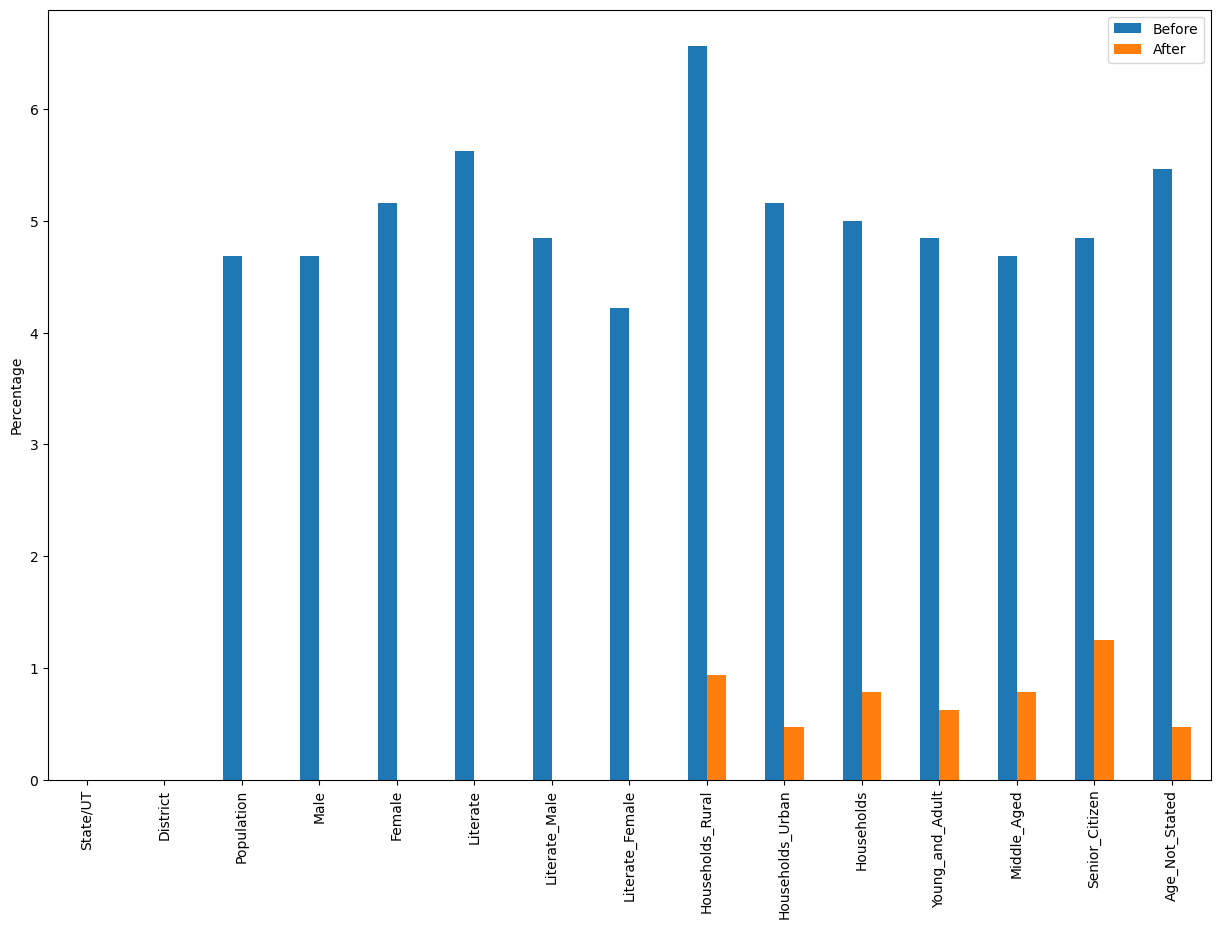

In [41]:
# After filling Null values, pleas find below bar plot which highlight percent of Null before and after.
ax = pd.concat([percet_na_missing, percet_na_missing_current], axis=1).rename({0: "Before", 1: "After"}, axis=1).plot.bar(figsize=(15, 10))
ax.set(ylabel="Percentage")
# ax.set_ylabel("Percentage")

### Problem 6

In [42]:
census_renamed_cols.to_csv("Clean/census_2011.csv")

## Problem 7

In [43]:
"""
Problem Statement 7: (Process the relevant data)
From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.
	District Name
	Rural/Urban
	Total Number of households
	Total Number of Livable
	Total Number of Dilapidated
	Latrine_premise

In the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. seem to be in percentage terms and not in absolute terms.
The total number of households in a district can be found in the census data. Take the information from the census data and find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.

Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, such that it  has the following column names:
	District
	Households_Rural
	Households_Rural_Livable
	Households_Rural_Dilapidated
	Households_Rural_Toilet_Premise
	Households_Urban
	Households_Urban_Livable
	Households_Urban_Dilapidated
	Households_Urban_Toilet_Premise

Report if any district data is in one file but not the other.
"""

'\nProblem Statement 7: (Process the relevant data)\nFrom the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.\n\uf0d8\tDistrict Name\n\uf0d8\tRural/Urban\n\uf0d8\tTotal Number of households\n\uf0d8\tTotal Number of Livable\n\uf0d8\tTotal Number of Dilapidated\n\uf0d8\tLatrine_premise\n\nIn the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. seem to be in percentage terms and not in absolute terms.\nThe total number of households in a district can be found in the census data. Take the information from the census data and find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.\n\nCalculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, such that it  has the following column names:\n\uf0d8\tDistrict\n\uf0d8\tHouseholds_Rural\n\uf0d

#### I assumed that Districts are unique and there are only 634 Districts

In [44]:
# Passing the columns for filtering
columns = '''District Name
Rural/Urban
Total Number of households
Total Number of Livable
Total Number of Dilapidated
Latrine_premise'''

columns_needed = columns.split("\n")

housing_col_filtered = pd.read_csv("Data/housing.csv", usecols=columns_needed)
housing_col_filtered = housing_col_filtered.rename({
    "District Name": "District"
}, axis=1)

In [45]:
housing_col_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   District                     1908 non-null   object 
 1   Rural/Urban                  1908 non-null   object 
 2   Total Number of households   1908 non-null   int64  
 3   Total Number of Livable      1908 non-null   float64
 4   Total Number of Dilapidated  1908 non-null   float64
 5   Latrine_premise              1908 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 89.6+ KB


In [46]:
housing_col_filtered = state_name_correction(housing_col_filtered, "District")

In [47]:
housing_col_filtered.head(3)

,District,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2


In [48]:
housing_col_filtered["District"].nunique()

634

In [49]:
# I am manually makking a dictionary for Urban and Rural data and multiplying percentage
def get_abs_data_list(df, key):
    data = {}
    for irow in range(len(df)):
        row = df.iloc[irow]

        key_value = row[key]
        if key_value not in data:
            data[key_value] = {}

        rural_urban = row['Rural/Urban']
        if rural_urban.lower() == "rural":
#             print(key_value)
            rural = census_renamed_cols.loc[census_renamed_cols[key] == key_value, "Households_Rural"].values[0]
            data[key_value]["Households_Rural"] = rural
            data[key_value]["Households_Rural_Livable"] = rural * row["Total Number of Livable"] / 100
            data[key_value]["Households_Rural_Dilapidated"] = rural * row["Total Number of Dilapidated"] / 100
            data[key_value]["Households_Rural_Toilet_Premise"] = rural * row["Latrine_premise"] / 100
        elif rural_urban.lower() == "urban":
            urban = census_renamed_cols.loc[census_renamed_cols[key] == key_value, "Households_Urban"].values[0]
            data[key_value]["Households_Urban"] = urban
            data[key_value]["Households_Urban_Livable"] = urban * row["Total Number of Livable"] / 100
            data[key_value]["Households_Urban_Dilapidated"] = urban * row["Total Number of Dilapidated"] / 100
            data[key_value]["Households_Urban_Toilet_Premise"] = urban * row["Latrine_premise"] / 100
    return data
# data

In [50]:
# Then converting the data and making a list and doing a DataFrame
L = []
data = get_abs_data_list(housing_col_filtered, "District")
for r in data:
    l = [r,
         data[r].get("Households_Rural", None),
         data[r].get("Households_Rural_Livable", None) ,
         data[r].get("Households_Rural_Dilapidated", None), 
         data[r].get("Households_Rural_Toilet_Premise", None),
         data[r].get("Households_Urban", None), 
         data[r].get("Households_Urban_Livable", None), 
         data[r].get("Households_Urban_Dilapidated", None), 
         data[r].get("Households_Urban_Toilet_Premise", None),
        ]
    L.append(l)
col_names = ["District", 
            "Households_Rural",
            "Households_Rural_Livable",
            "Households_Rural_Dilapidated",
            "Households_Rural_Toilet_Premise",
            "Households_Urban",
            "Households_Urban_Livable",
            "Households_Urban_Dilapidated",
            "Households_Urban_Toilet_Premise"]
housing_abs_value = pd.DataFrame(L, columns=col_names)

In [51]:
# District with
# I could see some of Rural/Urabn type is not given for some District, hence they become Nan
dist_list_with_None = housing_abs_value[housing_abs_value.isna().any(axis=1)]["District"]
t = housing_col_filtered.loc[housing_col_filtered["District"].isin(dist_list_with_None)]
pd.pivot_table(t,
              index=["District"],
              columns=["Rural/Urban"],
              values=["Latrine_premise"],
              aggfunc = 'count')

Latrine_premise            
Rural/Urban               Rural Total Urban
District                                   
Anuppur                     1.0   1.0   1.0
Bharatpur                   1.0   1.0   1.0
Central                     NaN   1.0   1.0
Chennai                     NaN   1.0   1.0
Chittoor                    1.0   1.0   1.0
Hyderabad                   NaN   1.0   1.0
Jashpur                     1.0   1.0   1.0
Khunti                      1.0   1.0   1.0
Kinnaur                     1.0   1.0   NaN
Kolkata                     NaN   1.0   1.0
Lahul and Spiti             1.0   1.0   NaN
Mahe                        NaN   1.0   1.0
Mumbai                      NaN   1.0   1.0
Mumbai Suburban             NaN   1.0   1.0
New Delhi                   NaN   1.0   1.0
Nicobars                    1.0   1.0   NaN
Surguja                     1.0   1.0   1.0
West Kameng                 1.0   1.0   1.0
Yanam                       NaN   1.0   1.0

In [52]:
census_renamed_cols[census_renamed_cols["Households_Rural"].isna()]["District"]

104    Bharatpur
364       Khunti
400      Surguja
401      Jashpur
460      Anuppur
553     Chittoor
Name: District, dtype: object

In [53]:
rural_dist_missing = census_renamed_cols[census_renamed_cols["Households_Rural"].isna()]["District"]
uraban_dist_missing = census_renamed_cols[census_renamed_cols["Households_Urban"].isna()]["District"]
print(set(rural_dist_missing).intersection(set(uraban_dist_missing)))
housing_col_filtered[housing_col_filtered["District"].isin(set(rural_dist_missing).intersection(set(uraban_dist_missing)))]
# For below State-Distrcit, The Household is Nan in census data
census_renamed_cols.loc[census_renamed_cols["District"].isin(housing_col_filtered[housing_col_filtered["District"].isin(set(rural_dist_missing).intersection(set(uraban_dist_missing)))]["District"].unique().tolist())]
# For these two district even through Rural is present in categroy, the Household value are Nan in census data

{'Anuppur', 'Khunti'}


,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
364,Jharkhand,Khunti,531885.0,266335.0,265550.0,284575.0,164741.0,119834.0,NaN,NaN,135719.0,327152.0,125649.0,78736.0,348.0
460,Madhya Pradesh,Anuppur,749237.0,379114.0,370123.0,436595.0,254120.0,182475.0,NaN,NaN,207713.0,NaN,193520.0,NaN,950.0


In [54]:
# Rounding the Values
numeric_cols = housing_abs_value.select_dtypes(include='number').columns
housing_abs_value[numeric_cols] = housing_abs_value[numeric_cols].apply(lambda x: round(x))

In [55]:
housing_abs_value.to_csv("Clean/housing.csv")

#### But I am mistaken after discussion with colleagues I understood some of the District names are dupkicates bt States hence I need to create new key with State And District

In [56]:
# Passing the columns for filtering
columns = '''State Name
District Name
Rural/Urban
Total Number of households
Total Number of Livable
Total Number of Dilapidated
Latrine_premise'''

columns_needed = columns.split("\n")

housing_col_filtered = pd.read_csv("Data/housing.csv", usecols=columns_needed)
housing_col_filtered = housing_col_filtered.rename({
    "State Name": "State/UT",
    "District Name": "District"
}, axis=1)

In [57]:
housing_col_filtered = state_name_correction(housing_col_filtered, "State/UT")
housing_col_filtered = state_name_correction(housing_col_filtered, "District")
housing_col_filtered['State/UT'] = housing_col_filtered[['State/UT', 'District']].apply(map_state_dict, axis=1)

In [58]:
def create_state_dist_key(df):
    df["State_District"] = df[["State/UT", "District"]].apply(lambda x: (x[0]+"_"+x[1]), axis=1)
    return df

In [59]:
housing_col_filtered = create_state_dist_key(housing_col_filtered)
census_renamed_cols = create_state_dist_key(census_renamed_cols)

In [60]:
# Then converting the data and making a list and doing a DataFrame
L = []
data = get_abs_data_list(housing_col_filtered, "State_District")
for r in data:
    s, d = r.split("_")
    l = [r,
         s,
         d,
         data[r].get("Households_Rural", None),
         data[r].get("Households_Rural_Livable", None) ,
         data[r].get("Households_Rural_Dilapidated", None), 
         data[r].get("Households_Rural_Toilet_Premise", None),
         data[r].get("Households_Urban", None), 
         data[r].get("Households_Urban_Livable", None), 
         data[r].get("Households_Urban_Dilapidated", None), 
         data[r].get("Households_Urban_Toilet_Premise", None),
        ]
    L.append(l)
col_names = ["State_District",
            "State/UT",
            "District", 
            "Households_Rural",
            "Households_Rural_Livable",
            "Households_Rural_Dilapidated",
            "Households_Rural_Toilet_Premise",
            "Households_Urban",
            "Households_Urban_Livable",
            "Households_Urban_Dilapidated",
            "Households_Urban_Toilet_Premise"]
housing_abs_value = pd.DataFrame(L, columns=col_names)

In [61]:
# I could see some of Rural/Urabn type is not given for some District, hence they become Nan
dist_list_with_None = housing_abs_value[housing_abs_value.isna().any(axis=1)]["State_District"]
t = housing_col_filtered.loc[housing_col_filtered["State_District"].isin(dist_list_with_None)]
pd.pivot_table(t,
              index=["State_District"],
              columns=["Rural/Urban"],
               values=["District"],
              aggfunc = 'count')

District            
Rural/Urban                             Rural Total Urban
State_District                                           
Andaman and Nicobar Islands_Nicobars      1.0   1.0   NaN
Andhra Pradesh_Chittoor                   1.0   1.0   1.0
Arunachal Pradesh_West Kameng             1.0   1.0   1.0
Chhattisgarh_Jashpur                      1.0   1.0   1.0
Chhattisgarh_Surguja                      1.0   1.0   1.0
Himachal Pradesh_Kinnaur                  1.0   1.0   NaN
Himachal Pradesh_Lahul and Spiti          1.0   1.0   NaN
Jharkhand_Khunti                          1.0   1.0   1.0
Madhya Pradesh_Anuppur                    1.0   1.0   1.0
Maharashtra_Mumbai                        NaN   1.0   1.0
Maharashtra_Mumbai Suburban               NaN   1.0   1.0
Nct Of Delhi_Central                      NaN   1.0   1.0
Nct Of Delhi_New Delhi                    NaN   1.0   1.0
Pondicherry_Mahe                          NaN   1.0   1.0
Pondicherry_Yanam                         NaN   1.0   1.0
Rajasthan_Bharatpur                       1.0   1.0   1.0
Tamil Nadu_Chennai                        NaN   1.0   1.0
Telangana_Hyderabad                       NaN   1.0   1.0
West Bengal_Kolkata                       NaN   1.0   1.0

In [62]:
rural_dist_missing = census_renamed_cols[census_renamed_cols["Households_Rural"].isna()]["State_District"]
uraban_dist_missing = census_renamed_cols[census_renamed_cols["Households_Urban"].isna()]["State_District"]
print(set(rural_dist_missing).intersection(set(uraban_dist_missing)))
housing_col_filtered[housing_col_filtered["State_District"].isin(set(rural_dist_missing).intersection(set(uraban_dist_missing)))]
# For below State-Distrcit, The Household is Nan in census data
census_renamed_cols.loc[census_renamed_cols["State_District"].isin(housing_col_filtered[housing_col_filtered["State_District"].isin(set(rural_dist_missing).intersection(set(uraban_dist_missing)))]["State_District"].unique().tolist())]
# For these two district even through Rural is present in categroy, the Household value are Nan in census data

{'Jharkhand_Khunti', 'Madhya Pradesh_Anuppur'}


,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,State_District
364,Jharkhand,Khunti,531885.0,266335.0,265550.0,284575.0,164741.0,119834.0,NaN,NaN,135719.0,327152.0,125649.0,78736.0,348.0,Jharkhand_Khunti
460,Madhya Pradesh,Anuppur,749237.0,379114.0,370123.0,436595.0,254120.0,182475.0,NaN,NaN,207713.0,NaN,193520.0,NaN,950.0,Madhya Pradesh_Anuppur


In [63]:
# Rounding the Values
numeric_cols = housing_abs_value.select_dtypes(include='number').columns
housing_abs_value[numeric_cols] = housing_abs_value[numeric_cols].apply(lambda x: round(x))

In [64]:
housing_abs_value.drop("State_District", axis=1).to_csv("Clean/housing_with_state.csv")

### Problem 8

In [65]:
"""
Problem Statement 8: (Visualise the housing data)
Visualize the following data for each state using appropriate methods:
	Number of households for 100 people
	Percentage of households that have toilet(s) in premise to the total number of households.
	Urban to rural population ratio.
"""

'\nProblem Statement 8: (Visualise the housing data)\nVisualize the following data for each state using appropriate methods:\n\uf0d8\tNumber of households for 100 people\n\uf0d8\tPercentage of households that have toilet(s) in premise to the total number of households.\n\uf0d8\tUrban to rural population ratio.\n'

<Axes: ylabel='State/UT'>

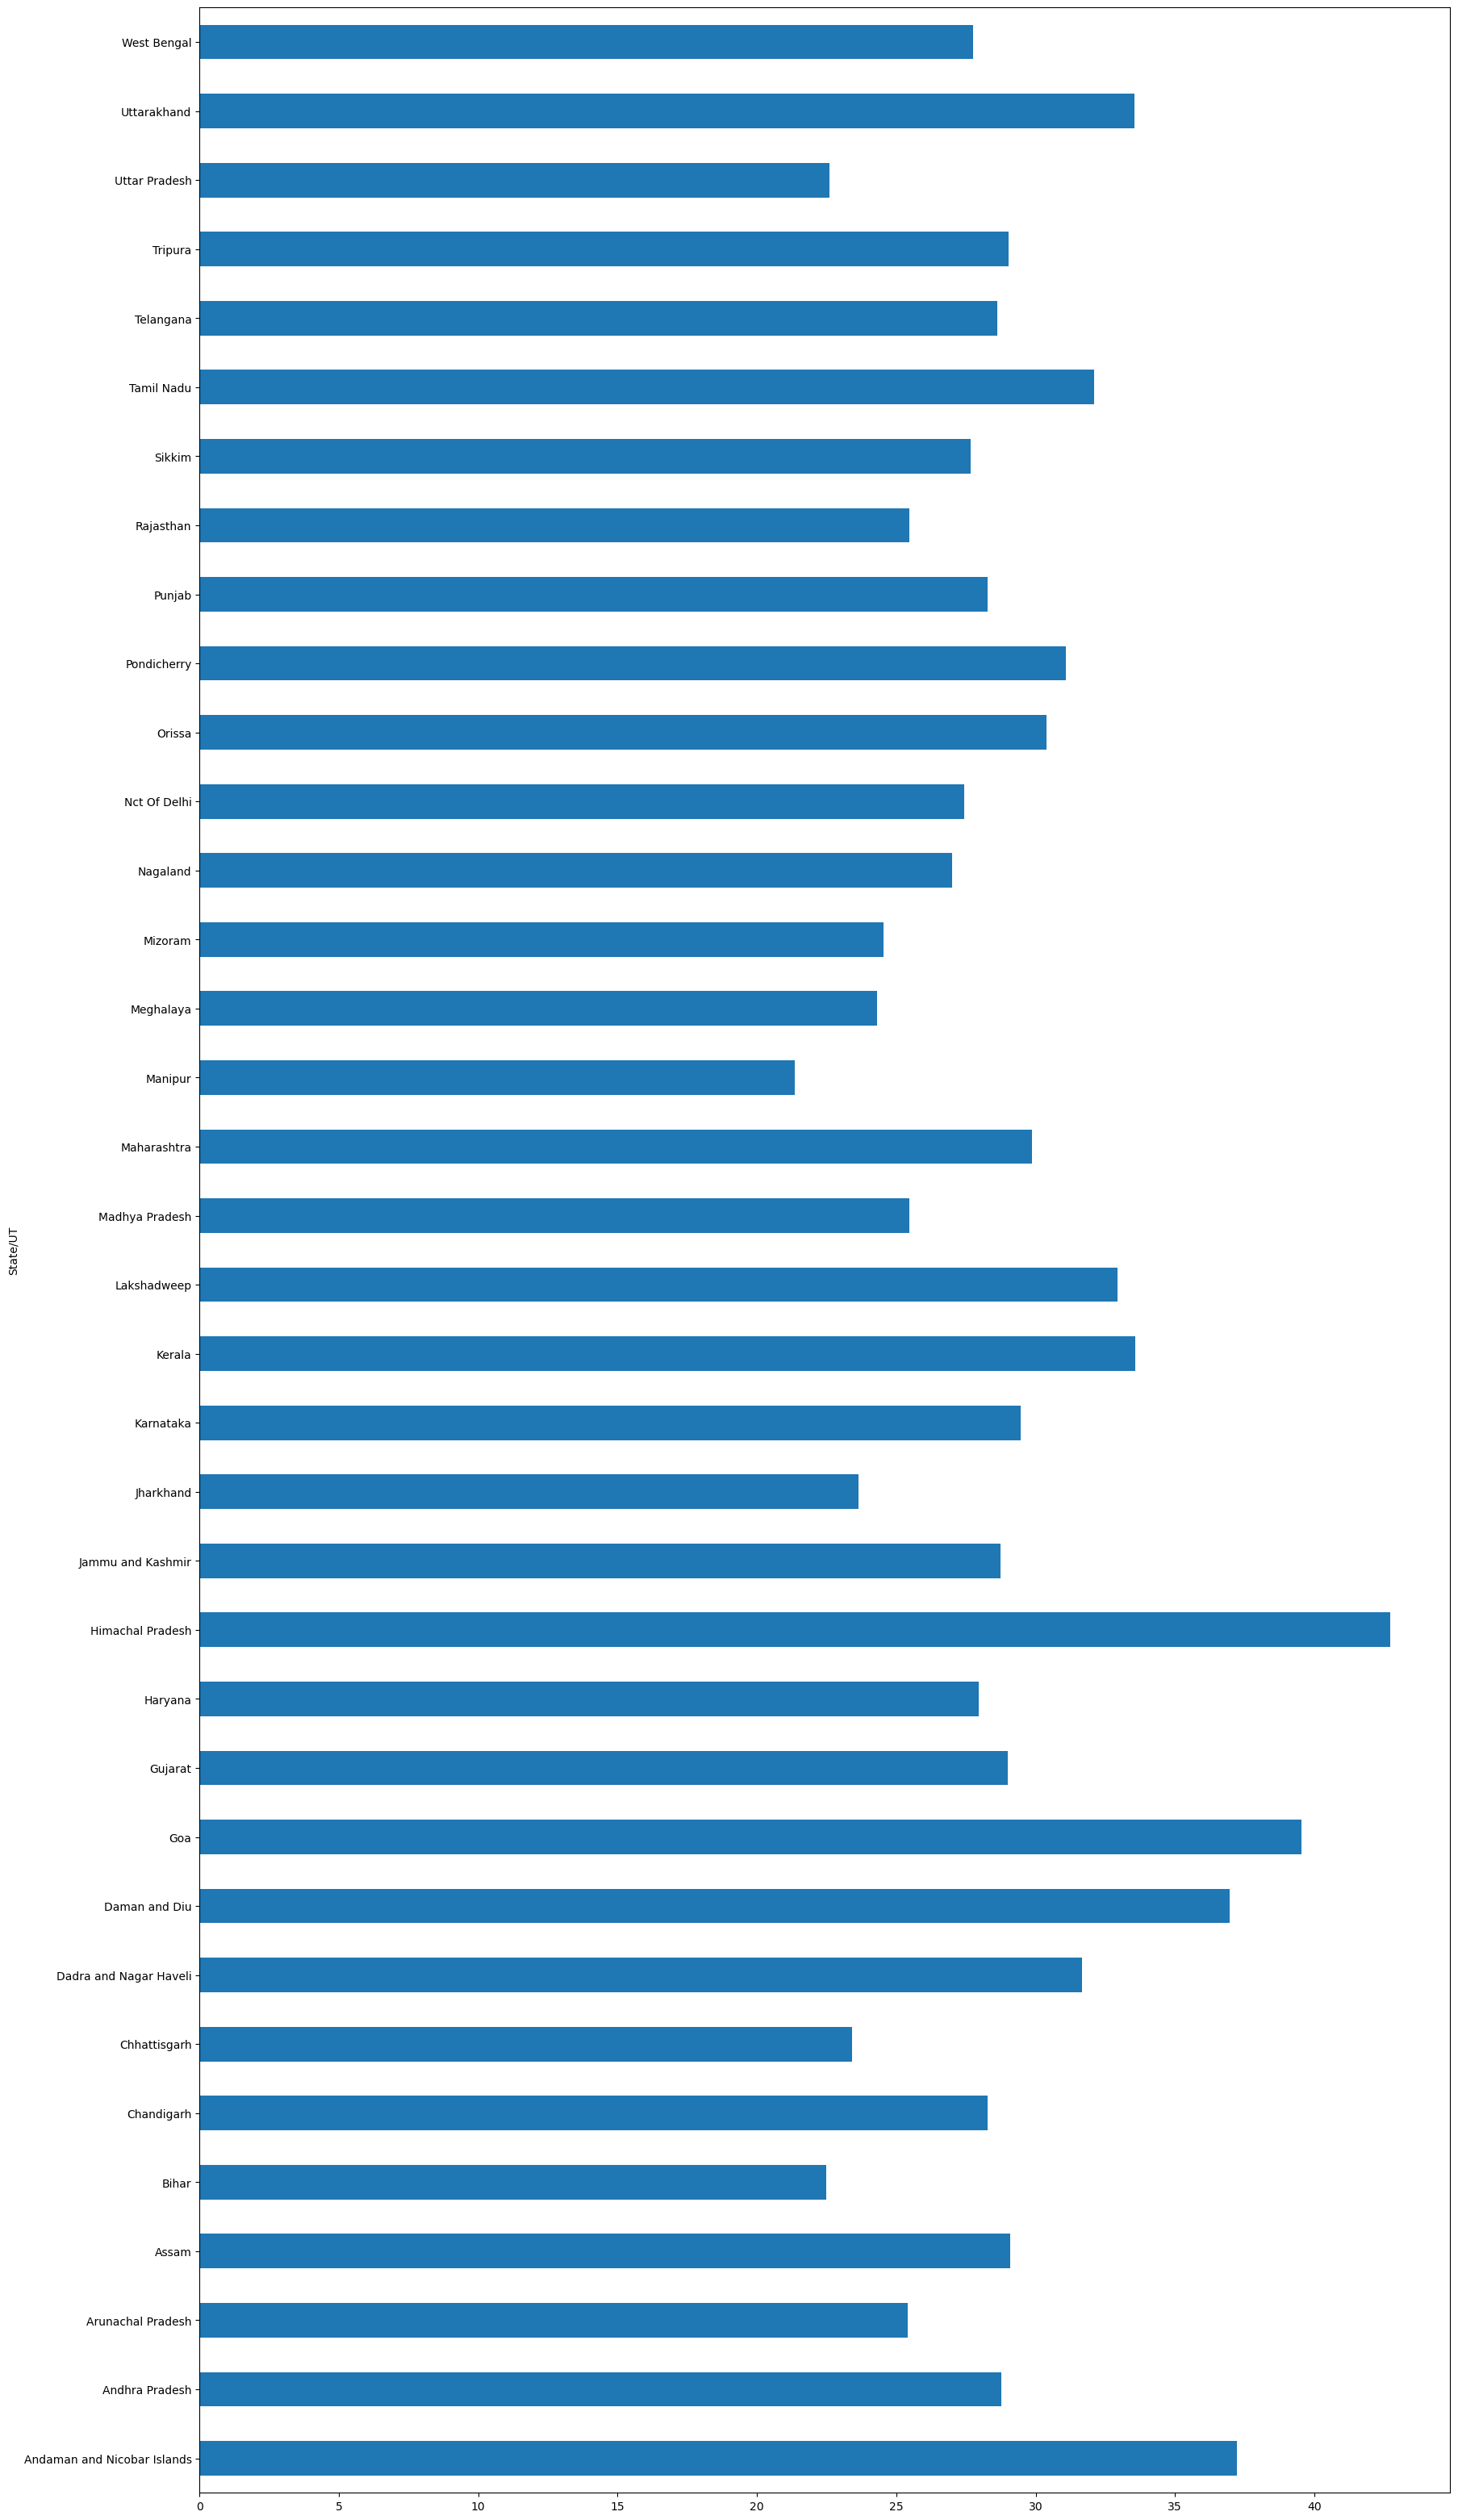

In [66]:
census_renamed_cols[[
    "State/UT", 
    "Households", 
    "Population"]
].groupby("State/UT").sum().apply(
#     (Household / Population) * 100
    lambda x: x[0]*100/x[1], axis=1
).plot.barh(figsize=(20, 40))

<Axes: ylabel='State/UT'>

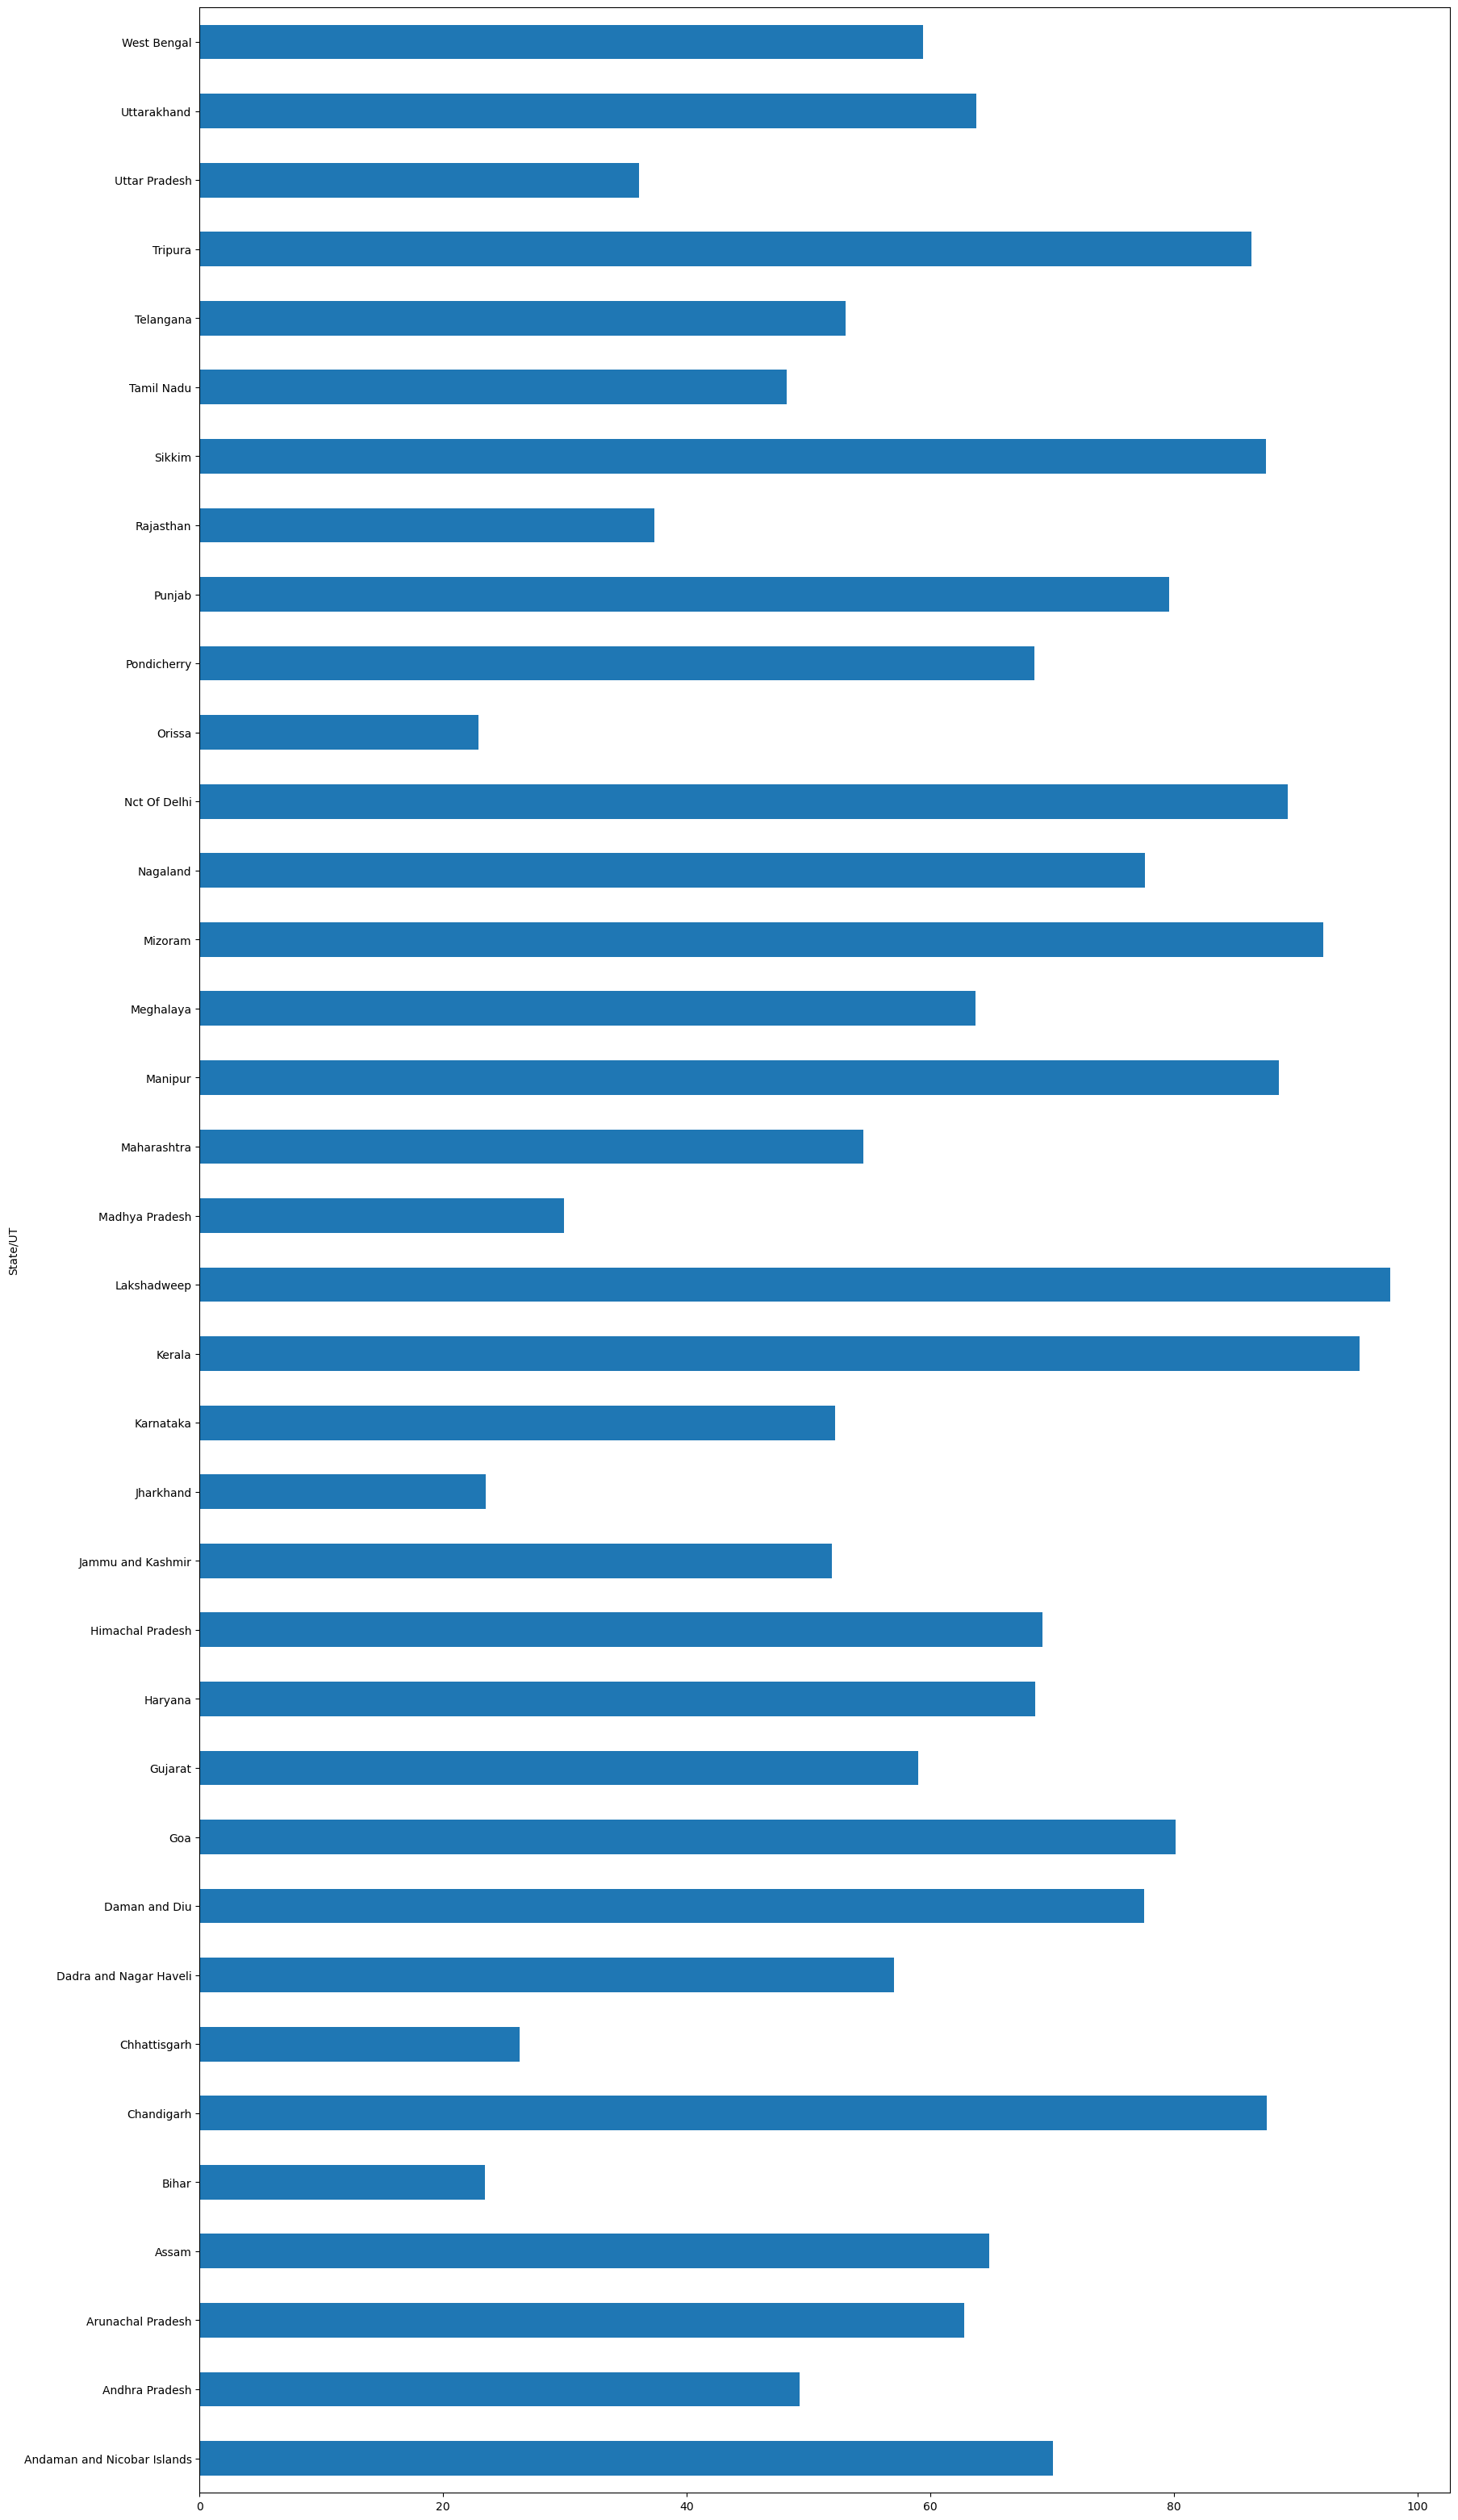

In [67]:
census_renamed_cols[[
    "State/UT",
    "District"
]].merge(housing_abs_value[[
    "State/UT",
    "District", 
    "Households_Rural",
    "Households_Urban",
    "Households_Rural_Toilet_Premise", 
    "Households_Urban_Toilet_Premise"]
], on=["State/UT", "District"], how="outer").groupby("State/UT")[[
    "Households_Rural",
    "Households_Urban",
    "Households_Rural_Toilet_Premise", 
    "Households_Urban_Toilet_Premise"
]].sum().apply(
    # (Households_Rural_Toilet_Premise + Households_Urban_Toilet_Premise) / (Households_Rural + Households_Urban)
    lambda x: (x[2] + x[3])/(x[0] + x[1]) * 100, axis=1
).plot.barh(figsize=(20, 40))

<Axes: ylabel='State/UT'>

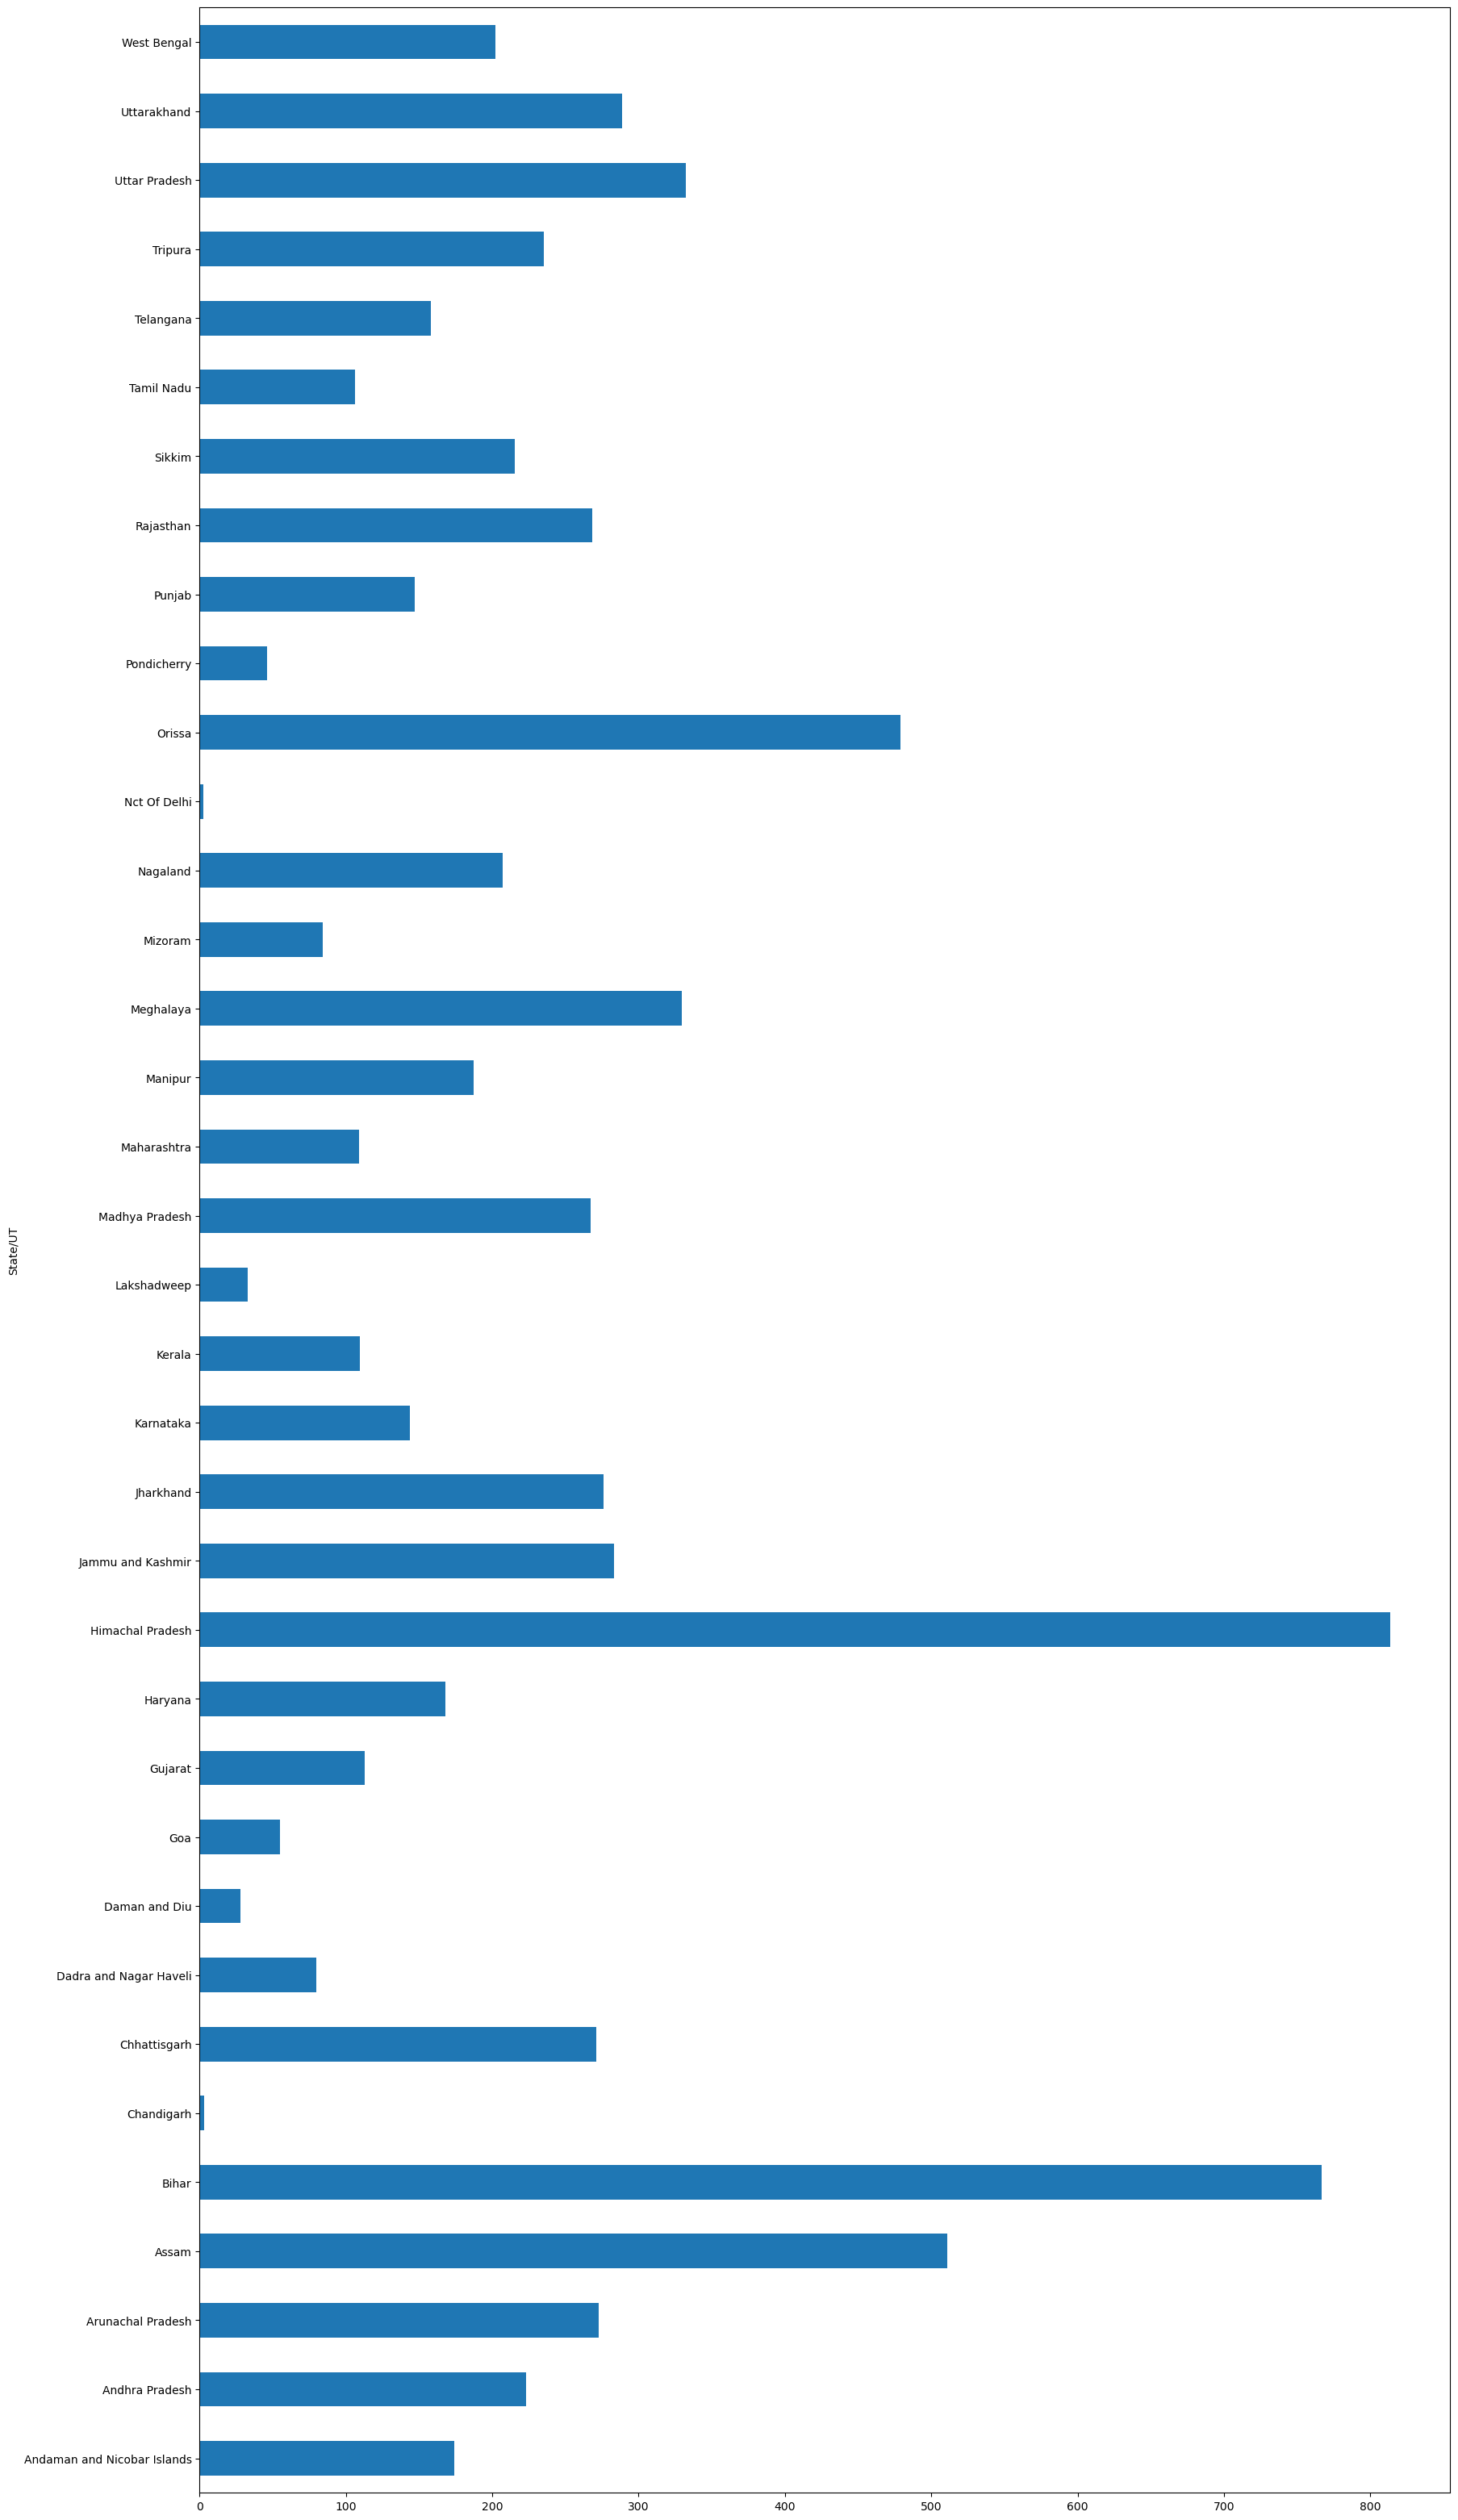

In [68]:
# We dont have Urban and Rural population
# But we have Urban and Rural Household data
# Since Household is propotional to population
# Also we can get average population per household, but still it will cancel out during calculation
# I assume finding household give a reasonable Urban-Rural ratio 
census_renamed_cols[[
    "State/UT",
    "District"
]].merge(housing_abs_value[[
    "State/UT",
    "District", 
    "Households_Rural",
    "Households_Urban"]
], on=["State/UT", "District"], how="outer").groupby("State/UT")[[
    "Households_Rural",
    "Households_Urban"
]].sum().apply(
    # (Households_Rural / Households_Urban)
    lambda x: (x[0] / x[1]) * 100, axis=1
).plot.barh(figsize=(20, 40))

### Problem 9

In [69]:
census_housing_rural_urban = census_renamed_cols[[
    "State/UT",
    "District",
    "Households_Rural",
    "Households_Urban"
]].merge(
    housing_abs_value[[
    "State/UT",
    "District", 
    "Households_Rural",
    "Households_Urban"]
    ],
    on=["State/UT","District"],
    how="outer",
    suffixes=("_census", "_housing")
)

census_housing_rural_urban[census_housing_rural_urban.isna().any(axis=1)]

,State/UT,District,Households_Rural_census,Households_Urban_census,Households_Rural_housing,Households_Urban_housing
24,Himachal Pradesh,Lahul and Spiti,17434.0,0.0,17434.0,NaN
33,Himachal Pradesh,Kinnaur,44514.0,0.0,44514.0,NaN
93,Nct Of Delhi,New Delhi,0.0,52664.0,NaN,52664.0
94,Nct Of Delhi,Central,0.0,194897.0,NaN,194897.0
104,Rajasthan,Bharatpur,NaN,129697.0,NaN,129697.0
245,Arunachal Pradesh,West Kameng,17889.0,NaN,17889.0,NaN
341,West Bengal,Kolkata,0.0,1308106.0,NaN,1308106.0
364,Jharkhand,Khunti,NaN,NaN,NaN,NaN
400,Chhattisgarh,Surguja,NaN,65167.0,NaN,65167.0
401,Chhattisgarh,Jashpur,NaN,20722.0,NaN,20722.0


In [70]:
# I am filling NaN as 0. Since some of Nan matches with 0 in other excel, some have both Nan hence considering them as well same
census_housing_rural_urban = census_housing_rural_urban.fillna(0)

In [71]:
census_housing_rural_urban["Households_Rural_percent"] = census_housing_rural_urban[["Households_Rural_census", "Households_Rural_housing"]].apply(lambda x: abs(x[0]-x[1])*100/x[0] if x[0] else abs(x[0]-x[1]) , axis=1)
census_housing_rural_urban["Households_Urban_percent"] = census_housing_rural_urban[["Households_Urban_census", "Households_Urban_housing"]].apply(lambda x: abs(x[0]-x[1])*100/x[0] if x[0] else abs(x[0]-x[1]) , axis=1)

In [72]:
# Getting the Distrcit with more diff in percentage than thresh
percent = 0
census_housing_rural_urban[(census_housing_rural_urban["Households_Rural_percent"]>percent) | (census_housing_rural_urban["Households_Urban_percent"]>percent)]
# Seems like the data is exactly matching

,State/UT,District,Households_Rural_census,Households_Urban_census,Households_Rural_housing,Households_Urban_housing,Households_Rural_percent,Households_Urban_percent


### Problem 10

In [88]:
hospital = pd.read_csv("Data/hospitals.csv")

In [89]:
hospital.head(3)

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320


In [90]:
pd.read_csv("Data/metadata.csv")

,Acronyms
0,"Number of Primary Health Centers(PHCs),"
1,"Community Health Centers(CHCs),"
2,Sub-District/Divisional Hospitals(SDHs)
3,District Hospitals(DHs)


In [91]:
rename_dict = { "Unnamed: 0": "State/UT",
    "PHC": "Number of Primary Health Centers(PHCs)",
    "CHC": "Community Health Centers(CHCs)",
    "SDH": "Sub-District/Divisional Hospitals(SDHs)",
    "DH": "District Hospitals(DHs)"}
hospital_renamed = hospital.rename(rename_dict, axis=1)

### Problem 11

In [92]:
# I've written the function in Problem 3
hospital_renamed = state_name_correction(hospital_renamed, "State/UT")

In [93]:
hospital_renamed.columns

Index(['State/UT', 'Number of Primary Health Centers(PHCs)',
       'Community Health Centers(CHCs)',
       'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs)',
       'Hospitals', 'HospitalBeds'],
      dtype='object')

In [94]:
cols = ['Number of Primary Health Centers(PHCs)',
        'Community Health Centers(CHCs)',
        'Sub-District/Divisional Hospitals(SDHs)', 
        'District Hospitals(DHs)',
        'Hospitals',
        'HospitalBeds']
for col in cols:
    hospital_renamed[col] = pd.to_numeric(hospital_renamed[col].str.replace(",", ""))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State/UT                                 37 non-null     object 
 1   Number of Primary Health Centers(PHCs)   37 non-null     int64  
 2   Community Health Centers(CHCs)           37 non-null     int64  
 3   Sub-District/Divisional Hospitals(SDHs)  30 non-null     float64
 4   District Hospitals(DHs)                  37 non-null     int64  
 5   Hospitals                                37 non-null     int64  
 6   HospitalBeds                             37 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.1+ KB


In [96]:
hospital_renamed.to_csv("Clean/all_hospitals.csv")

### Problem Statement 12

In [ ]:
# First I am getting Ppulation data from census and adding a new column in hospital df
# For "All India", I am adding all Population
hospital_renamed = hospital_renamed.set_index("State/UT")
hospital_renamed["Population"] = census_renamed_cols.groupby("State/UT")["Population"].sum()
hospital_renamed = hospital_renamed.reset_index()
hospital_renamed.loc[hospital_renamed["State/UT"] == "All India", "Population"] = hospital_renamed.loc[hospital_renamed["State/UT"] != "All India", "Population"].sum()

In [ ]:
# Converting string to number
hospital_renamed["HospitalBeds"] = hospital_renamed["HospitalBeds"].str.replace(",","").astype(int)

In [ ]:
hospital_renamed["HospitalBedTo10KPopulation"] = (hospital_renamed["HospitalBeds"] /hospital_renamed["Population"]) * 10000

In [ ]:
hospital_renamed[["State/UT", "HospitalBedTo10KPopulation"]].set_index("State/UT")

In [ ]:
# hospital_renamed[["State/UT", "HospitalBedTo10KPopulation"]].set_index("State/UT").sort_values("HospitalBedTo10KPopulation").plot.bar()
fig,ax= plt.subplots()
hospital_renamed[["State/UT", "HospitalBedTo10KPopulation"]].set_index("State/UT").plot(kind="bar", ax=ax,figsize=(15,7))
# hospital_renamed[["State/UT", "HospitalBedTo10KPopulation"]].set_index("State/UT").plot.bar()

mean = hospital_renamed["HospitalBedTo10KPopulation"].mean()
ax.axhline(mean, color='r')

In [ ]:
# The Three States with least HospitalBedTo10KPopulation
hospital_renamed[["State/UT", "HospitalBedTo10KPopulation"]].set_index("State/UT").sort_values("HospitalBedTo10KPopulation").head(3)

### Problem 13

In [ ]:
columns = """State/UT
Rural_Government_Hospitals
Rural_Government_Beds
Urban_Government_Hospitals
Urban_Government_Beds
Last_Updated"""

columns_names = columns.split("\n")

gov_hospital = pd.read_csv("Data/government_hospitals.csv", skiprows=2, header=None, names=columns_names)

### Problem 14

In [ ]:
gov_hospital["Last_Updated"] = pd.to_datetime(gov_hospital["Last_Updated"], format="%d.%m.%Y")

In [ ]:
# The Fn is create is Problem 3
gov_hospital = state_name_correction(gov_hospital, "State/UT")

In [ ]:
gov_hospital.to_csv("Clean/government_hospital.csv")

### Problem 15

In [ ]:
least_three_states = hospital_renamed[["State/UT", "HospitalBedTo10KPopulation"]].set_index("State/UT").sort_values("HospitalBedTo10KPopulation").head(3).index
print(least_three_states, least_three_states.tolist())

# hospital_renamed.loc[hospital_renamed["State/UT"].isin(least_three_states)].set_index("State/UT")["Hospitals"].astype(int)

# The Lowest Hosputals is Jharkhand
gov_hospital[gov_hospital["State/UT"].isin(least_three_states)].set_index("State/UT")[["Rural_Government_Hospitals", "Urban_Government_Hospitals"]].sum(axis=1).sort_values()

# hospital_renamed.loc[hospital_renamed["State/UT"].isin(least_three_states)].set_index("State/UT")["Hospitals"].astype(int) - gov_hospital[gov_hospital["State/UT"].isin(least_three_states)].set_index("State/UT")[["Rural_Government_Hospitals", "Urban_Government_Hospitals"]].sum(axis=1)

### Problem 16

In [ ]:
hospital_renamed["HospitalBedTo1KPopulation"] = (hospital_renamed["HospitalBeds"] /hospital_renamed["Population"]) * 1000

In [ ]:
# hospital_renamed[["State/UT", "HospitalBedTo10KPopulation"]].set_index("State/UT").sort_values("HospitalBedTo10KPopulation").plot.bar()
fig,ax= plt.subplots()
hospital_renamed[["State/UT", "HospitalBedTo1KPopulation"]].set_index("State/UT").plot(kind="bar", ax=ax,figsize=(15,7))
# hospital_renamed[["State/UT", "HospitalBedTo10KPopulation"]].set_index("State/UT").plot.bar()

standard = 3
ax.axhline(standard, color='r')

### Problem 17

In [ ]:
# Change to Int
hospital_renamed["Hospitals"] = hospital_renamed["Hospitals"].str.replace(",", "").astype(int)

# Perform Floor on number
hospital_renamed["AvgBedPerHospital"] = (hospital_renamed["HospitalBeds"]/hospital_renamed["Hospitals"]).apply(lambda x: int(x))

In [ ]:
hospital_renamed["HospitalBedTo10KPopulation"]

In [ ]:
# (Standard - Current_Bed_Hospital_Ration) * Population/1000
hospital_renamed["RemainigBedNeedForWHOStandard"] = ( (3.0 - hospital_renamed["HospitalBedTo1KPopulation"]).apply(lambda x: x if x>0 else 0) * hospital_renamed["Population"].fillna(0) / 1000.0 ).apply(lambda x: round(x))

In [ ]:
hospital_renamed["RemainigBedNeedForWHOStandard"]

In [ ]:
hospital_renamed.set_index("State/UT")["RemainigBedNeedForWHOStandard"].plot.bar(figsize=(15,7))

## Part2

### Problem 18

In [ ]:
# !pip install pyodbc

In [97]:
import os
import re
import math
import pyodbc

In [98]:
# driver = "ODBC Driver 18 for SQL Server"
driver = "SQL Server"
server = "DESKTOP-1CRN3V1"
db = "HealthCareDB"
port = 1433
# conn_url = f'DRIVER={driver};Server={server};Database={db};Port={port};Integrated Security=SSPI'
conn_url = f'DRIVER={driver};Server={server};Port={port}'
conn = pyodbc.connect(conn_url)

In [99]:
curs = conn.cursor()

In [100]:
# Refresh DataBase

switch_db = "use master"
curs.execute(switch_db)
curs.commit()

# drop_db = "Drop database HealthCareDB"
# curs.execute(drop_db)
# curs.commit()

create_db = "create database HealthCareDB"
curs.execute(create_db)
curs.commit()

use_db = "use HealthCareDB"
curs.execute(use_db)
curs.commit()

In [101]:
def create_table(file_name):
    
    # Parse DataFrame
    df = pd.read_csv(file_name, infer_datetime_format=True, index_col=0)
    
    # Parse Date in DF
    if "Last_Updated" in df.columns:
        df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

    # DType Mappinf For Creatinf Table
    dtype_map = {
        "object": "varchar(50)",
        "int64": "int",
        "float64": "decimal(10, 2)",
        "datetime64[ns]": "date",
    }
    
    # Replace / with _ in col names
    pat = "/|-| |\)|\("
    
    col_to_be_rep = [col for col in df.columns if re.search(pat, col)]
    rename_map = {col: re.sub(pat, "_", col) for col in col_to_be_rep}
    df = df.rename(rename_map, axis=1)

    # -------------------------------------Create Table Starts------------------------------------------------
    table_name = file_name.split("/")[-1].split(".")[0]
    create_table_query = f"""
    create table {table_name}(
    """

    # Define Col Types
    for col in df.columns:
        col_type = f"\t{col} {dtype_map[str(df[col].dtypes)]},\n"
        create_table_query = create_table_query + col_type

    # Define Primary Key
    primary_col = ""
    foreign_key = ""
    if "State_UT" in df.columns:
        primary_col = "State_UT"
        foreign_key = f"\tconstraint fk_{table_name}_State_UT foreign key(State_UT) references state(State_UT)"
    if "District" in df.columns:
        if primary_col:
            primary_col += ","
            foreign_key += ",\n"
        primary_col += "District"
        foreign_key = foreign_key + f"\tconstraint fk_{table_name}_District foreign key(District) references district(District)"
    prim_key = f"\tconstraint pk_{table_name}_{primary_col.replace(',', '_')} primary key({primary_col}),\n"
    
    if table_name not in ("state", "district"):
        create_table_query = create_table_query + prim_key + foreign_key
    else:
        create_table_query = create_table_query + prim_key

    create_table_query = create_table_query + "\n)"
#     print(create_table_query)

    # Execute the Create Table command
    curs.execute(create_table_query)
    curs.commit()
    print(f"{table_name} created successfully")
    # -------------------------------Create Table Ends-----------------------------------------
    

    #--------------------------------Insert Data Starts-----------------------------------------------
    
    # Fill NA with None
    df = df.replace({pd.NaT: None, np.NaN: None})
    insert_query = f"INSERT INTO {table_name} values({','.join(['?']*len(df.columns))})"
    for row in list(df.values.tolist()):
#         print(insert_query, row)
        curs.execute(insert_query, *row)
#     print(insert_query)
    curs.commit()
    #--------------------------------Insert Data Ends-----------------------------------------------

In [102]:
df = pd.read_csv("Clean/all_hospitals.csv")
state_table = df["State/UT"]
df = pd.read_csv("Clean/census_2011.csv")
district_table = df["District"]
state_table = pd.DataFrame(state_table.unique(), columns=["State_UT"])
state_table.to_csv("Clean/Help/state.csv")
district_table = pd.DataFrame(district_table.unique(), columns=["District"])
district_table.to_csv("Clean/Help/district.csv")

In [103]:
for f in os.listdir("Clean/Help"):
    file_path = f"Clean/Help/{f}"
    if os.path.isfile(file_path):
        create_table(file_path)

district created successfully
state created successfully


In [104]:
for f in os.listdir("Clean/"):
    file_path = f"Clean/{f}"
    if os.path.isfile(file_path):
        create_table(file_path)

all_hospitals created successfully
census_2011 created successfully
government_hospital created successfully
housing created successfully
housing_with_state created successfully


### Problem 20

In [ ]:
query = """
select 
    table_rnk.State_UT
    ,table_rnk.District
    ,table_rnk.no_house_without_toilet
    ,table_rnk.ratio
from
(
    select 
        tbl.State_UT
        ,tbl.District
        ,tbl.no_house_without_toilet
        ,tbl.ratio
        ,dense_rank() over(order by ratio) as rnk
    from 
        (select
            c.State_UT
            ,c.District
            --,(h.Households_Rural+h.Households_Urban)
            --,(h.Households_Rural_Toilet_Premise+h.Households_Urban_Toilet_Premise)
            ,(h.Households_Rural+h.Households_Urban) - (h.Households_Rural_Toilet_Premise+h.Households_Urban_Toilet_Premise) as no_house_without_toilet
            ,ah.HospitalBeds/sum(c.Population) over(partition by c.State_UT) as ratio
        from all_hospitals ah
        join census_2011 c on c.State_UT = ah.State_UT
        join housing h on c.District = h.District
    ) tbl
) table_rnk
where table_rnk.rnk <= 3
"""

data = curs.execute(query)
data.fetchall()

### Problem 22

In [105]:
# pd.read_csv("Data/")

### Problem 24

In [126]:
query = "exec district_report_liv_dilap"
data = curs.execute(query)
l = data.fetchall()
df = pd.DataFrame.from_records(l, columns = ['District', 'Population', 'no_liv_per1000', 'no_dilap_per1000'])
# df = pd.DataFrame(data.fetchall())
cols = [ 'Population', 'no_liv_per1000', 'no_dilap_per1000']
for col in cols:
    df[col] = df[col].astype(float)

<Axes: xlabel='District'>

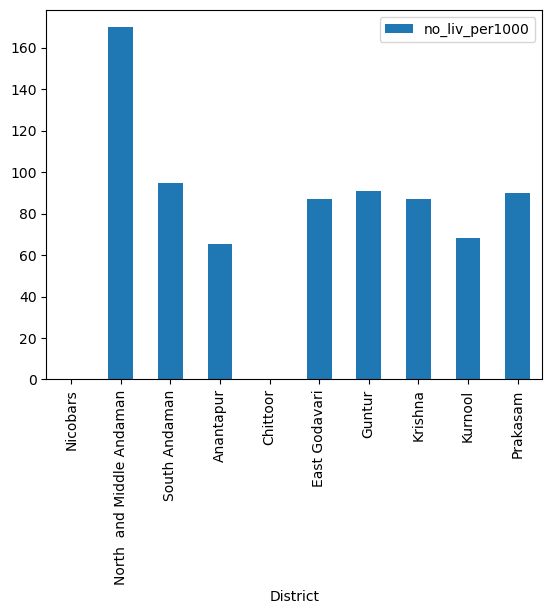

In [140]:
df.iloc[:10].plot.bar(x="District", y="no_liv_per1000")

<Axes: xlabel='District'>

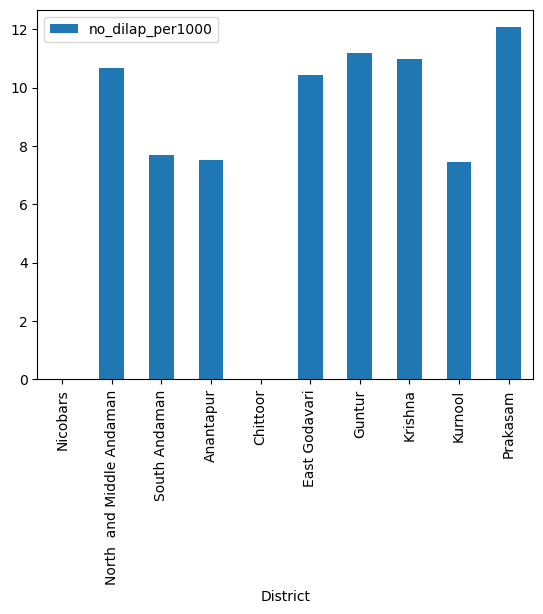

In [141]:
df.iloc[:10].plot.bar(x="District", y= "no_dilap_per1000")

<Axes: xlabel='District'>

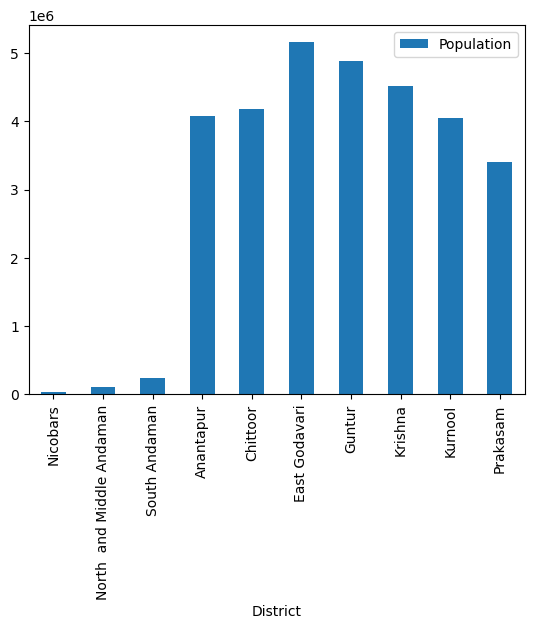

In [142]:
df.iloc[:10].plot.bar(x="District", y= "Population")